[wasserstein GAN and the kantorovich-Rubinstein Duality](https://vincentherrmann.github.io/blog/wasserstein/)
# Wasserstein GAN(WGAN) and the Kantorovich-Rubinstein Duality

## 1. Earth Mover's Distance

$l$ states로 이루어진 두 discrete probability distribution $P_r, P_\theta$ 이 주어져있다.

$EMD(P_r, P_\theta) = \inf_{\gamma \in \prod} \sum_{x,y} ||x-y||\gamma(x,y)= \inf_{\gamma \in \prod}\mathbb{E}_{(x,y)\sim \gamma}||x-y||$  
 
$\sum_x \gamma(x,y) = P_r(y), \sum_y \gamma(x,y) = P_\theta(x)$(Marginal Probability)

$D=||x-y||, \Gamma =\gamma(x,y)$ 라고 하면, $\Gamma, D\in \mathbb{R}^{l\times l}$ 이게 되고 

$EMD(P_r, P_\theta)= \inf_{\gamma \in \prod}\langle D, \Gamma \rangle_{F}$ 

$\langle , \rangle_F$ 은  the Frobenius inner product이며, 두 matrix를 element-wise하게 곱한 후 다 더한 값이다.

## 2. Linear Programming

$A \in \mathbb{R}^{m\times n}, b\in \mathbb{R}^m, c\in \mathbb{R}^n$이 고정되어 있을 때,

$Ax=b, x\geq 0$ 을 만족하면서 $z=c^Tx$를 최소화하는 $x\in \mathbb{R}^n$ 을 찾는 문제이다.  

위 문제를 mapping 해보면, $n= l^2, m=2l$ ($2l$ 개의 constraint가 존재하며, $l^2$ 의 변수를 찾는 문제이다. )

$x= vec(\Gamma), c=vec(D)$ 로 대응시킬 수 있으며, $b = \begin{bmatrix} P_r \\\ P_\theta \end{bmatrix}$

$A = \begin{bmatrix} 1&&1&&\cdots &&0&&0&&\cdots &&\cdots&&0 &&0&& \cdots\\ 0 && 0 &&\cdots &&1 && 1 &&\cdots &&\cdots && 0 && 0 && \cdots \\\vdots&&\vdots&&\vdots &&\vdots&&\vdots&&\vdots &&\vdots&&\vdots &&\vdots&& \vdots\\ 0 && 0 &&\cdots &&0 && 0 &&\cdots &&\cdots && 1 && 1 && \cdots  \\ 1 && 0 &&\cdots &&1 && 0 &&\cdots &&\cdots && 1 && 0 && \cdots \\ 0 && 1 &&\cdots &&0 && 1 &&\cdots &&\cdots && 0 && 1 && \cdots \\ \vdots && \vdots &&\ddots &&\vdots && \vdots &&\ddots &&\cdots && \vdots && \vdots && \ddots \\ 0 && 0 &&\cdots &&0 && 0 &&\cdots &&\cdots && 0 && 0 && \cdots \end{bmatrix}\in \mathbb{R}^{2l\times l^2}$,  
$x = \begin{bmatrix}\gamma(x_1, y_1) \\ \gamma(x_1,y_2)\\\vdots \\ \gamma(x_2, y_1)\\\gamma(x_2,y_2) \\ \vdots \\ \vdots \\ \gamma(x_n,y_1) \\ \gamma(x_n,y_2) \\\vdots \end{bmatrix}\in \mathbb{R}^{l^2}$

## 3. Dual Form

실제 GAN에서 $$\gamma$$를 구하여 earth mover distance를 구하는 것은 불가능하다. 하지만, **EMD**(earth mover distance)를 구하도록 학습시킬 수는 있다.
Duality를 이용해서 **EMD**를 쉽게 구해보자.
모든 **LP**(linear programming) 문제들은 다음과 같이 문제를 정의할 수 있다.

**primal form**: 

minimize $z = c^Tx$ when $Ax=b$ and  $x\geq 0$ 

**dual form:**

maximize $\widetilde{z}=b^Ty$ when $A^Ty\leq c$

$z = c^T x \geq (A^Ty)^T x = y^T A x = y^Tb=\widetilde{z}^T = \widetilde{z}$

$A$ : fixed matrix

$b$ : marginal probability

$c$ : point-to-point distance

$z$ : **EMD**

## 4. Farkas Theorem

1. $\hat{A}= [a_1 | a_2 | \cdots | a_n ]\in \mathbb{R}^{d\times n} $, $x\in\mathbb{R}^n_{\geq 0}$ 일 때 $\hat{A}x$ 가 표현할 수 있는 영역은 $\mathbb{R}^d$에서  원점을 꼭지점으로 가지는 어떤 도형으로 생각해 볼 수 있다.

2. $\hat{b}\in \mathbb{R}^d$ 에 대해서, $\hat{A}x = \hat{b}$으로 표현이 되는 $x \in \mathbb{R}^n_{\geq 0}$가 존재하는 경우와 존재하지 않는 경우를 생각해 볼 수 있다.

3. 존재하지 않는 경우, 다음과 같은 조건을 만족하는 hyperplane $h$가 존재한다.

   > * 원점을 지난다.
   > * $\hat{b}$ 와 $\hat{A}x(x \in \mathbb{R}^n_{\geq 0})$인 도형 사이에 존재한다.

4. hyperplane $h$에 수직인 $\hat{y}$ 를 생각해 볼 수 있고, $\hat{b}^T\hat{y}>0$이면서 $\hat{A}^T\hat{y} \leq 0$이게 잡을 수 있다. 

   이는 $h$를 중심으로 $\hat{b}$와 $a_i$ 들이 다른 위치에 있기 때문이다. 

## 5. Strong Duality

**primal form**: 

minimize $z = c^Tx$ when $Ax=b$ and $x\geq 0$ 

* 위 문제를 만족하는 최소의 solution 을 $z^* = c^Tx^*, Ax^*=b$ 라고 하자.

$\hat{A} = \begin{bmatrix} A \\ -c^T \end{bmatrix}$, $\hat{b_{\epsilon}} = \begin{bmatrix} b \\-z^*+\epsilon \end{bmatrix}$ , $\hat{y} = \begin{bmatrix} y \\ \alpha\end{bmatrix}$

만약 $\epsilon = 0 $ 이면, $\hat{A}x^* = \hat{A} = \begin{bmatrix} Ax^* \\ -c^Tx^* \end{bmatrix}= \begin{bmatrix} b \\ -z^* \end{bmatrix}=\hat{b_0}$

만약 $\epsilon > 0 $ 이면, $\hat{A}x' = \hat{b_\epsilon}$ 이 존재한다면,

$Ax'=b$, and $c^Tx' = z^*-\epsilon$ 이 되어서 $x^*$의 최소성에 모순이 된다.

고로 $\hat{A} x = \hat{b_\epsilon}$의 해가 없게 되고 **Farkas theorem**에 의해

$\hat{y}$ 가 존재하여 $\hat{b_\epsilon}^T\hat{y}>0$이면서 $\hat{A}^T\hat{y}\leq 0$

$\Leftrightarrow b^T y - z^* \alpha  + \epsilon \alpha > 0$ 이고 $A^Ty-c\alpha \leq 0 $



$\Leftrightarrow b^T y > \alpha(z^* - \epsilon)$, $c^T\alpha \geq A^Ty $

### $\alpha >0$
$\alpha z^*=\alpha c^Tx^*\geq (A^Ty)^Tx^*=y^TAx^*=y^Tb>\alpha(z^*-\epsilon)$  

$\alpha\epsilon >0$  
$\therefore \alpha>0$

$y_\epsilon = \frac{y}{\alpha}$ 라고 하자.

그러면, $b^Ty_\epsilon > z^*-\epsilon$ 이고 $A^Ty_\epsilon\leq c$ 인 $y_\epsilon$이 모든 $\epsilon>0$에 대해서 존재한다고 말할 수 있다.

한편 
$z^* = c^T x^* \geq (A^Ty_\epsilon)^T x^* = y_\epsilon^T A x^* = y_\epsilon^Tb=b^Ty_\epsilon>z^*-\epsilon$  

$\epsilon \rightarrow 0$ 일 때,  $z^*>b^Ty_\epsilon > z^*-\epsilon$ 이고 $A^Ty_\epsilon\leq c$ 인 $y_\epsilon$이 존재한다.


**primal form**: 

minimize $z = c^Tx$ when $Ax=b$ and $x\geq 0$ 

**dual form:**

maximize $\widetilde{z}=b^Ty$ when $A^Ty\leq c$

이 두 문제는 결국 같은 $z$를 구한다.

## 6. Dual implementation

이제 Strong duality를 이용해서 primal form 문제의 답을 dual form 문제의 답으로 해결해도 된다.  
### 6.1 Recall
$A = \begin{bmatrix} 1&&1&&\cdots &&0&&0&&\cdots &&\cdots&&0 &&0&& \cdots\\ 0 && 0 &&\cdots &&1 && 1 &&\cdots &&\cdots && 0 && 0 && \cdots \\\vdots&&\vdots&&\vdots &&\vdots&&\vdots&&\vdots &&\vdots&&\vdots &&\vdots&& \vdots\\ 0 && 0 &&\cdots &&0 && 0 &&\cdots &&\cdots && 1 && 1 && \cdots  \\ 1 && 0 &&\cdots &&1 && 0 &&\cdots &&\cdots && 1 && 0 && \cdots \\ 0 && 1 &&\cdots &&0 && 1 &&\cdots &&\cdots && 0 && 1 && \cdots \\ \vdots && \vdots &&\ddots &&\vdots && \vdots &&\ddots &&\cdots && \vdots && \vdots && \ddots \\ 0 && 0 &&\cdots &&0 && 0 &&\cdots &&\cdots && 0 && 0 && \cdots \end{bmatrix}\in \mathbb{R}^{2l\times l^2}$  


$c^T = \begin{bmatrix} D_{1,1} && D_{1,2}&&\cdots&&|&&D_{2,1}&&D_{2,2}&&\cdots&&|&&\cdots \end{bmatrix} $  
**Note**
1. $D_{i,i}=0$
2. $D_{i,j}=D_{j,i}$

$$b = \begin{bmatrix} P_r \\ P_\theta \end{bmatrix}$$
$$y^* = \begin{bmatrix} f \\ g\end{bmatrix} \in \mathbb{R}^{2l}$$

* $f, g$는 $l$ dim vector이지만, 함수로 보기로 한다.
$$f_1,f_2,\cdots,f_l =f(x_1),f(x_2),\cdots f(x_l)$$
$$g_1,g_2,\cdots,g_l =g(x_1),g(x_2),\cdots g(x_l)$$
* $D_{i,j}=||x_i-x_j||$

### 6.2 Dual form problem

$EMD(P_r,P_\theta)=\max f^TP_r+g^TP_\theta$ when $$A^Ty \leq c\Leftrightarrow f(x_i)+g(x_j)\leq D_{i,j}$$
  
$$f(x_i)+g(x_i) \leq D_{i,i}=0$$

여기에서도 애매하게 설명하긴 했는데, nonnegative 한 $P_r, P_\theta$를 이용하여 $f_TP_r+g^T_\theta$를 최대화해야 하기 때문에 $f(x_i)+g(x_i)$가 크면 클수록 좋다. 그렇기 때문에 $f(x_i)=-g(x_i)$이어야 한다.


$D_{i,j}\geq f(x_i)+g(x_j) =f(x_i)-f(x_j)$  
$D_{i,j}=D_{j,i}\geq f(x_j)-f(x_i)$
$\Rightarrow |f(x_i)-f(x_j)| \leq D_{i,j}=||x_i-x_j||$

#### 6.2.1 Lipschitz continuity

**Def)** $f: \mathbb{R}\rightarrow \mathbb{R}$ 가 lipschitz continuous
$\Leftrightarrow$ 만약에 양수인 $K$가 존재하여 모든 실수 $x_1, x_2$에 대해
$|f(x_1)-f(x_2)|\leq K|x_1-x_2|$


위의 $f$는 $K=1$인 경우의 Lipschitz continuous 를 만족하고, $||f||_{L\leq1}$ 로 쓴다.  
모든 constraint의 조건들이 Lipschitz continuous를 만족하는 함수로 함축되게 된다.

$$EMD(P_r, P_\theta) = \sup_{||f||_{L\leq1}} \mathbb{E}_{x\sim P_r}f(x)- \mathbb{E}_{x\sim P_\theta} f(x)$$

직관적으로 봤을 때, $P_r>P_\theta$ 일 때 $f$가 크고, $P_r<P_\theta$일 때 $f$가 작을 때 우항이 최대가 됨을 알 수 있다.

## 7. Wasserstein Distance

그 전까지 discrete probability distributions 들에 대해서 다뤘기 때문에 여기에서는 continuous 한 probability distribution을 다루도록 한다.

$W(P_r, P_\theta) = \inf_{\gamma \in \pi} \int_x \int_y ||x-y||\gamma(x,y) dx dy = \inf_{\gamma \in \pi} \mathbb{E}_{x,y \sim \gamma}[||x-y||]$  
$$W(P_r, P_\theta) = \inf_{\gamma \in \pi} \mathbb{E}_{x,y \sim \gamma}[||x-y||]$$

해당 블로그 글과 별반 차이 없으므로 관두도록 한다.

In [1]:
from utils import *

In [2]:
hidden = 10

In [3]:
X1 = tf.placeholder(tf.float32, [None])
X2 = tf.placeholder(tf.float32, [None])
with tf.variable_scope("first") as scope:
    h1_1 = tf.tanh(linear(X1, 1, hidden*2))
    scope.reuse_variables()
    h2_1 = tf.tanh(linear(X2, 1, hidden*2))
with tf.variable_scope("last") as scope:
    h1_2 = linear(h1_1, hidden*2, 1)
    scope.reuse_variables()
    h2_2 = linear(h2_1, hidden*2, 1)
y1 = tf.reduce_mean(h1_2)
y2 = tf.reduce_mean(h2_2)
target = y2-y1
print_keys("trainable_variables")
var_list = tf.trainable_variables()
gradients = tf.gradients(ys = -1*target, xs=var_list)
train_op = tf.train.AdamOptimizer(0.05).apply_gradients(zip(gradients, var_list))
clip_op = clip_op(0.05, "trainable_variables")

Collection name : trainable_variables
Tensor("first/weights/read:0", shape=(1, 20), dtype=float32)
Tensor("first/biases/read:0", shape=(20,), dtype=float32)
Tensor("last/weights/read:0", shape=(20, 1), dtype=float32)
Tensor("last/biases/read:0", shape=(1,), dtype=float32)


In [4]:
pd1 = {'mu' : 0, 'sigma' : 1}
pd2 = {'mu' : 10, 'sigma' : 1}
pd3 = {'mu' : 30, 'sigma' : 1}

In [5]:
'''
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(0, 20, 100)
y1 = gaussian_function(x1, mu = pd1['mu'] , sigma = pd1['sigma'])
y2 = gaussian_function(x2, mu = pd2['mu'], sigma = pd2['sigma'])
plt.plot(x1, y1, 'b-', label = pd_spec(pd1))
plt.plot(x2, y2, 'r-', label = pd_spec(pd2)) 
plt.title("Two gaussian distributions")
plt.legend()
plt.show()
'''

'\nx1 = np.linspace(-10, 10, 100)\nx2 = np.linspace(0, 20, 100)\ny1 = gaussian_function(x1, mu = pd1[\'mu\'] , sigma = pd1[\'sigma\'])\ny2 = gaussian_function(x2, mu = pd2[\'mu\'], sigma = pd2[\'sigma\'])\nplt.plot(x1, y1, \'b-\', label = pd_spec(pd1))\nplt.plot(x2, y2, \'r-\', label = pd_spec(pd2)) \nplt.title("Two gaussian distributions")\nplt.legend()\nplt.show()\n'

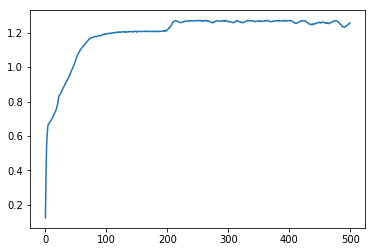

In [5]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

target_tract = []
for i in range(500):
    sample1 = sampling(100, pd1)
    sample2 = sampling(100, pd3)
    sess.run(train_op, feed_dict = {X1 : sample1, X2 : sample2} )
    sess.run(clip_op)
    target_tract.append(sess.run(target, feed_dict = {X1 : sample1, X2 : sample2}))

plt.plot(target_tract)
plt.show()

In [ ]:
'''
i=0 
while True:
    try:
        temp = tf.trainable_variables()[i]
        print("{} : {}".format(temp.op.name, sess.run(temp)))
        i+=1
    except IndexError:
        break
'''

(200,)


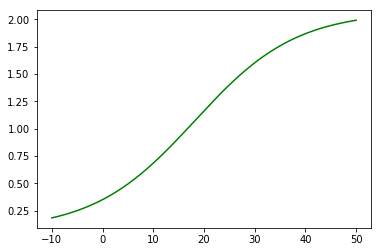

In [7]:
test = np.linspace(-10, 50, 200)
test_y = np.reshape(sess.run(h1_2, feed_dict = {X1 : test}), [-1])
print(test_y.shape)
plt.plot(test, test_y,'g-')
plt.show()